In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/SEAL/V1/Gempy_2.3.1/"
geo_model = gp.create_model("SEAL_v1")

No module named 'osgeo'


## Step by step

In [3]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 19479.4, 0, 21369.7, -3060, 0],
    resolution=[100, 100, 100],
    path_i=data_path + "surface_points_less_less_crono_scaled.csv",
    path_o=data_path + "orientations_points_less_less.csv",
)

Active grids: ['regular']


SEAL_v1  2024-01-17 18:55

In [4]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,EOC-SUP,Default series,1,#015482,1
1,EOC-MED,Default series,2,#9f0052,2
2,EOC-INF,Default series,3,#ffbe00,3
3,PAL-SUP,Default series,4,#728f02,4
4,PAL-INF,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [5]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "EOC-SUP",
            "EOC-MED",
            "EOC-INF",
            "PAL-SUP",
            "PAL-INF",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,EOC-SUP,Strat_Series,1,#015482,1
1,EOC-MED,Strat_Series,2,#9f0052,2
2,EOC-INF,Strat_Series,3,#ffbe00,3
3,PAL-SUP,Strat_Series,4,#728f02,4
4,PAL-INF,Strat_Series,5,#443988,5
5,basement,Basement_series,1,#ff3f20,6


In [6]:
geo_model.set_default_orientation()

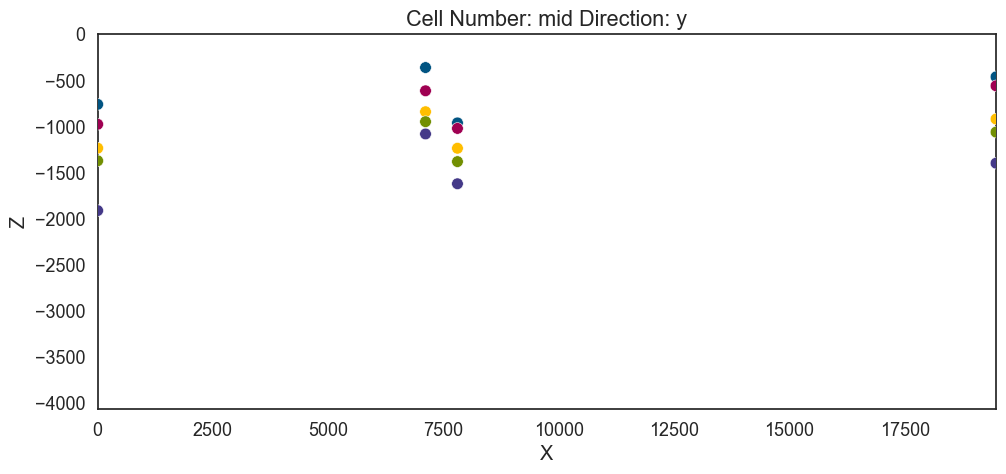

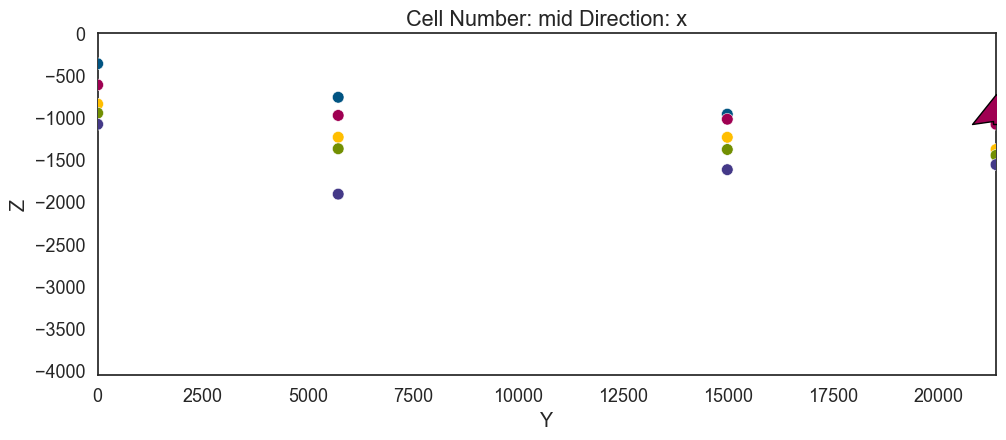

In [7]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [8]:
geo_model.get_data()

X        Y     Z    smooth  surface           G_x   
surface_points 0   12863.8  21369.7  -990  0.000002  EOC-SUP           NaN  \
               5    7108.9      0.0  -360  0.000002  EOC-SUP           NaN   
               10      0.0   5721.5  -759  0.000002  EOC-SUP           NaN   
               15   7801.4  14977.7  -960  0.000002  EOC-SUP           NaN   
               20  19479.4  12344.5  -461  0.000002  EOC-SUP           NaN   
               1   12863.8  21369.7 -1080  0.000002  EOC-MED           NaN   
               6    7108.9      0.0  -612  0.000002  EOC-MED           NaN   
               11      0.0   5721.5  -975  0.000002  EOC-MED           NaN   
               16   7801.4  14977.7 -1020  0.000002  EOC-MED           NaN   
               21  19479.4  12344.5  -558  0.000002  EOC-MED           NaN   
               2   12863.8  21369.7 -1380  0.000002  EOC-INF           NaN   
               7    7108.9      0.0  -839  0.000002  EOC-INF           NaN   
               12      0.0   5721.5 -1234  0.000002  EOC-INF           NaN   
               17   7801.4  14977.7 -1235  0.000002  EOC-INF           NaN   
               22  19479.4  12344.5  -918  0.000002  EOC-INF           NaN   
               3   12863.8  21369.7 -1450  0.000002  PAL-SUP           NaN   
               8    7108.9      0.0  -947  0.000002  PAL-SUP           NaN   
               13      0.0   5721.5 -1371  0.000002  PAL-SUP           NaN   
               18   7801.4  14977.7 -1380  0.000002  PAL-SUP           NaN   
               23  19479.4  12344.5 -1060  0.000002  PAL-SUP           NaN   
               4   12863.8  21369.7 -1560  0.000002  PAL-INF           NaN   
               9    7108.9      0.0 -1080  0.000002  PAL-INF           NaN   
               14      0.0   5721.5 -1911  0.000002  PAL-INF           NaN   
               19   7801.4  14977.7 -1620  0.000002  PAL-INF           NaN   
               24  19479.4  12344.5 -1397  0.000002  PAL-INF           NaN   
orientations   0   12863.8  21369.7 -1080  0.010000  EOC-MED  1.000000e-12   

                            G_y  G_z  
surface_points 0            NaN  NaN  
               5            NaN  NaN  
               10           NaN  NaN  
               15           NaN  NaN  
               20           NaN  NaN  
               1            NaN  NaN  
               6            NaN  NaN  
               11           NaN  NaN  
               16           NaN  NaN  
               21           NaN  NaN  
               2            NaN  NaN  
               7            NaN  NaN  
               12           NaN  NaN  
               17           NaN  NaN  
               22           NaN  NaN  
               3            NaN  NaN  
               8            NaN  NaN  
               13           NaN  NaN  
               18           NaN  NaN  
               23           NaN  NaN  
               4            NaN  NaN  
               9            NaN  NaN  
               14           NaN  NaN  
               19           NaN  NaN  
               24           NaN  NaN  
orientations   0   1.000000e-12  1.0

In [9]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [10]:
%%time
gp.set_interpolator(
    geo_model, 
    #utput=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range               29199.224347
$C_o$            20299873.867857
drift equations           [3, 3]
CPU times: total: 17.7 s
Wall time: 18.1 s


In [11]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 31.6 s
Wall time: 4.09 s



Lithology ids 
  [6. 6. 6. ... 1. 1. 1.] 

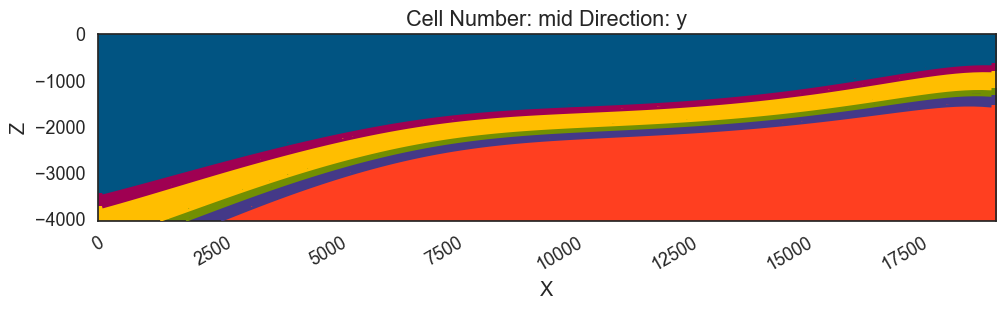

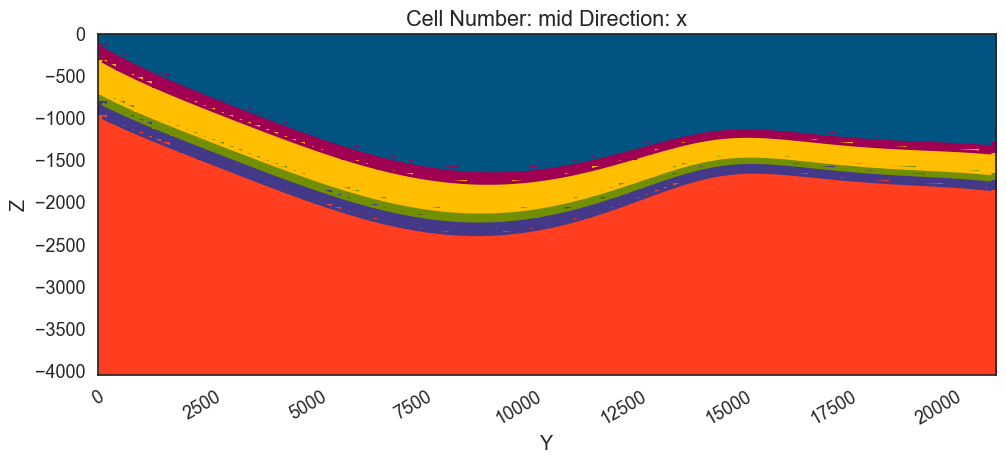

In [12]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [13]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)